# 대출 승인 예측(Loan Approval Prediction)

이 노트북은 대출 승인 예측 - [대출 예측](https://www.kaggle.com/ninzaami/loan-predication/home) 데이터 세트를 기반으로 합니다. 대출 승인은 신용/은행 업계에서 가장 흔히 발생하는 문제입니다. 대출이 승인되기에 안전한지 여부를 어떻게 정확하게 예측할 수 있을까요? 이것이 우리가 이 노트에서 살펴볼 내용입니다.

## 1.패키지 및 데이터 가져오기

In [1]:
# 패키지 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn import svm

# CSV 데이터 읽기

data = pd.read_csv("[Dataset] Module 19 (Loan Prediction).csv")

In [2]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### 특성:

1. 성별 : 남/여 (기본정보)

2. 결혼 여부: 예/아니오 (후보자의 부양 여부를 확인하기 위해 표시합니다.)

3. 피부양자 : 부양가족 수(후보자의 부채를 확인하기 위해 다시 기록합니다.)

4. 학력: 졸업/미졸업 (차용인의 대출상환능력을 이해하는데 도움이 됩니다.)

5. 자영업자 : 예/아니오 (차용인의 소득 흐름을 확인합니다.)

6. 공동 신청인 소득 : 숫자 (차용인의 대출 상환 능력을 이해하는 데 도움이됩니다.)

7. 대출금액: 숫자(대출자가 차용인의 상환가능성을 이해하는데 도움이됩니다.)

8. 대출기간 : 숫자 (대출자가 원금으로 총이자를 계산하는 데 도움이됩니다.)

9. 거주지역 : 도시/농촌/반도시(대출자의 생활수준을 이해하는데 도움이됩니다.)

10. 대출여부 : 예/아니오 (이는 대출기관의 최종 결정 사항입니다.)

## 2. 데이터 품질 및 누락 데이터 평가

데이터 세트에서 누락된 데이터를 찾습니다..

#### 누락된 데이터는 다음과 같은 여러 가지 이유로 인해 발생할 수 있습니다.

1. 검증 실패

2. 관찰 실패

3. 관찰 데이터 기록 실패

#### 누락된 데이터를 수정하는 것은 다음과 같은 이유로 매우 중요합니다.

1. ML 모델의 결정에 영향을 주어 모델의 정확도를 떨어뜨릴 수 있습니다.

2. 하나의 클래스로 모델을 편향되게 만들어 기록할 수 없는 부정확성을 초래합니다.

#### 항상 누락된 데이터의 수를 확인하는 것이 좋습니다.

1. 누락된 데이터의 수가 많은 경우 가능한 방법은 행/열의 평균을 취하여 누락된 위치의 데이터를 추정하는 것입니다.

2. 누락된 데이터의 수가 적으면 누락된 행을 삭제할 수 있습니다.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 성별 - 누락된 값

In [5]:
# 누락된 "성별" 데이터의 %
print('Percent of missing "Gender" records is %.2f%%' %((data['Gender'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "Self_Employed " records is %.2f%%' %((data['Self_Employed'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "Credit_History" records is %.2f%%' %((data['Credit_History'].isnull().sum()/data.shape[0])*100))
# data.shape[0] * 100= 누락된데이터를 퍼센티지로 나타내고 싶음

Percent of missing "Gender" records is 2.12%
Percent of missing "Self_Employed " records is 5.21%
Percent of missing "Credit_History" records is 8.14%


이 값은 성별 데이터에서 값이 누락되어 있는 비율입니다. 이를 감안하여야 합니다. 누락된 값은 일반적으로 데이터 세트에 불균형을 초래하여 기계 학습 모델의 예측에 영향을 미칩니다.

In [6]:
# Gender 항목의 count 값 그래프로 나타내기 ( seaborn 의 countplot 사용)
# your code here

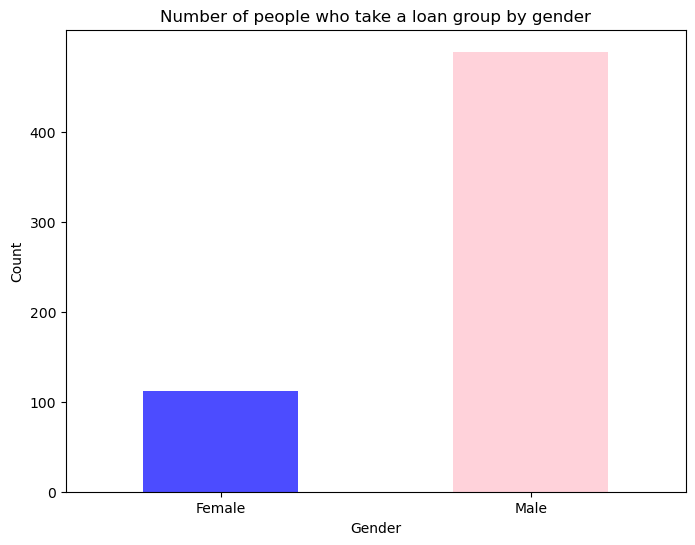

In [53]:
plt.figure(figsize=(8, 6))
gender_loan_count.plot(kind="bar", color=["blue", "pink"], alpha=0.7)
plt.title("Number of people who take a loan group by gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.xticks(rotation=0)  # x축 레이블을 0도로 회전
plt.yticks(range(0, max(gender_loan_count) + 1, 100))  # y축 간격을 100으로 설정
plt.show()

In [52]:
gender_loan_count = data.groupby("Gender")["Loan_ID"].count()
gender_loan_count

Gender
Female    112
Male      489
Name: Loan_ID, dtype: int64

### 결혼 여부 - 누락된 값

In [11]:
# 누락된 "결혼 여부" 데이터의 %
print('Percent of missing "Married" records is %.2f%%' %((data['Married'].isnull().sum()/data.shape[0])*100))

Percent of missing "Married" records is 0.49%


In [9]:
# Married 항목의 count 값 그래프로 나타내기 ( seaborn 의 countplot 사용)
# your code here





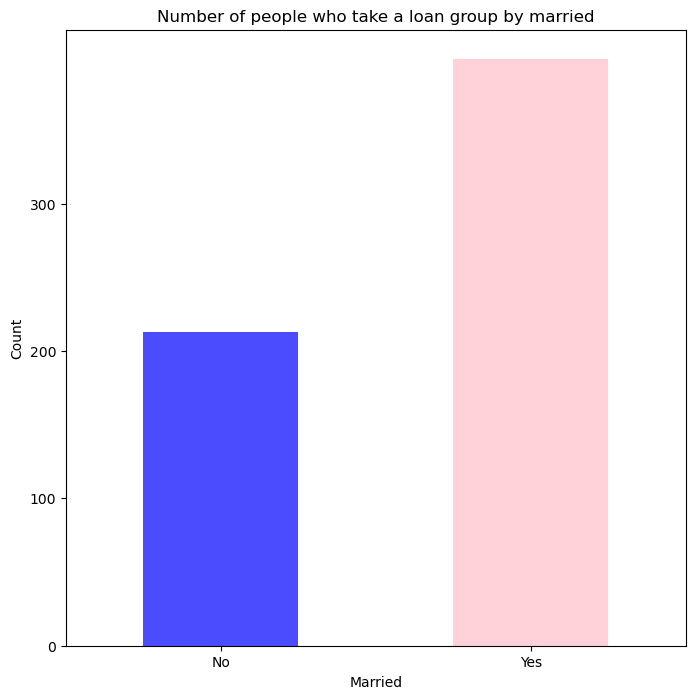

Married
No     213
Yes    398
Name: Loan_ID, dtype: int64

In [16]:
married_loan_count = data.groupby("Married")["Loan_ID"].count()
married_loan_count

plt.figure(figsize=(8, 8))
married_loan_count.plot(kind="bar", color=["blue", "pink"], alpha=0.7)
plt.title("Number of people who take a loan group by married")
plt.ylabel("Count")
plt.xlabel("Married")
plt.xticks(rotation=0)  # x축 레이블을 0도로 회전
plt.yticks(range(0, max(married_loan_count) + 1, 100))  # y축 간격을 100으로 설정
plt.show()
married_loan_count = data.groupby("Married")["Loan_ID"].count()
married_loan_count

### 피부양자- 누락된 값

In [18]:
# 누락된 "피부양자" 데이터의 %
print('Percent of missing "Dependents" records is %.2f%%' %((data['Dependents'].isnull().sum()/data.shape[0])*100))

Percent of missing "Dependents" records is 2.44%


In [ ]:
# Dependents 항목의 count 값 그래프로 나타내기 ( seaborn 의 countplot 사용)
# your code here





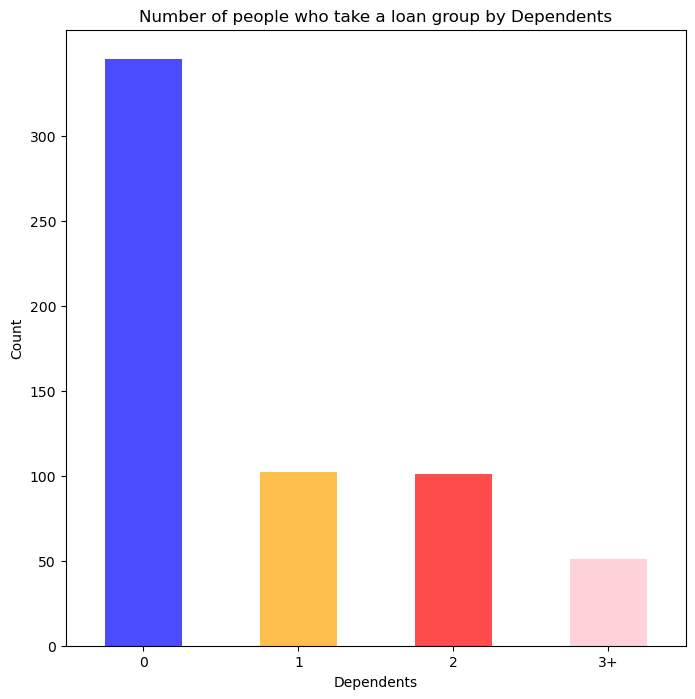

Dependents
0     345
1     102
2     101
3+     51
Name: Loan_ID, dtype: int64

In [19]:
dependents_loan_count = data.groupby("Dependents")["Loan_ID"].count()
dependents_loan_count

plt.figure(figsize=(8, 8))
dependents_loan_count.plot(kind="bar", color=["blue", "orange", "red", "pink"], alpha=0.7)
plt.title("Number of people who take a loan group by Dependents")
plt.ylabel("Count")
plt.xlabel("Dependents")
plt.xticks(rotation=0)  # x축 레이블을 0도로 회전
plt.yticks(range(0, max(dependents_loan_count) + 1, 50))  # y축 간격을 100으로 설정
plt.show()
dependents_loan_count = data.groupby("Dependents")["Loan_ID"].count()
dependents_loan_count

### 자영업자 - 누락된 값

In [ ]:
# 누락된 "자영업자" 데이터의 %
print('Percent of missing "Self_Employed" records is %.2f%%' %((data['Self_Employed'].isnull().sum()/data.shape[0])*100))

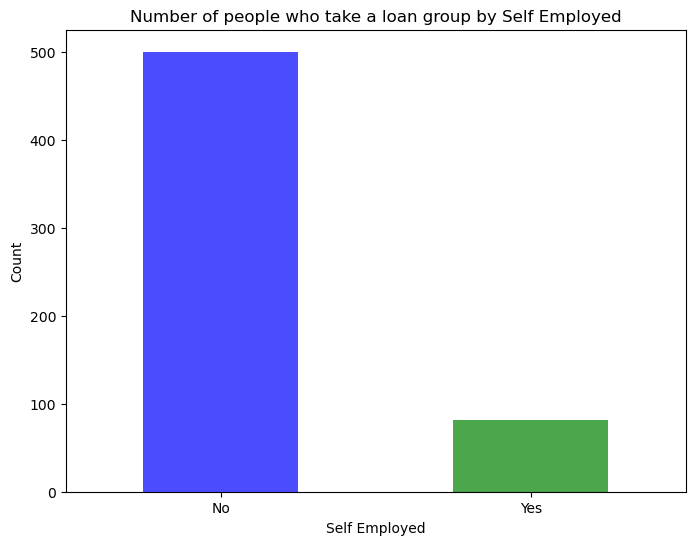

Number of people who take a loan group by Self Employed :
Self_Employed
No     500
Yes     82
Name: Loan_ID, dtype: int64


In [20]:
# Self_Employed 항목의 count 값 그래프로 나타내기 ( seaborn 의 countplot 사용)
# your code here

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

self_employed_loan_count = data.groupby("Self_Employed")["Loan_ID"].count()
self_employed_loan_count

plt.figure(figsize=(8, 6))
self_employed_loan_count.plot(kind="bar", color=["blue", "green"], alpha=0.7)
plt.title("Number of people who take a loan group by Self Employed")
plt.ylabel("Count")
plt.xlabel("Self Employed")
plt.xticks(rotation=0)  # x축 레이블을 0도로 회전
plt.show()

# 결과 출력
print("Number of people who take a loan group by Self Employed :")
print(self_employed_loan_count)



### 대출금액 - 누락된 값

In [ ]:
# 누락된 "대출금액" 데이터의 %
print('Percent of missing "LoanAmount" records is %.2f%%' %((data['LoanAmount'].isnull().sum()/data.shape[0])*100))

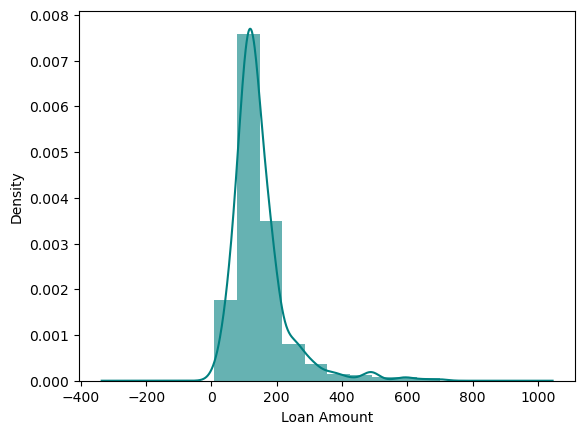

In [21]:
ax = data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

### 대출기간 - 누락된 값

In [22]:
# 누락된 "대출기간" 데이터의 %
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((data['Loan_Amount_Term'].isnull().sum()/data.shape[0])*100))

Percent of missing "Loan_Amount_Term" records is 2.28%


In [ ]:
# Loan_Amount_Term 항목의 count 값 그래프로 나타내기 ( seaborn 의 countplot 사용)
# your code here





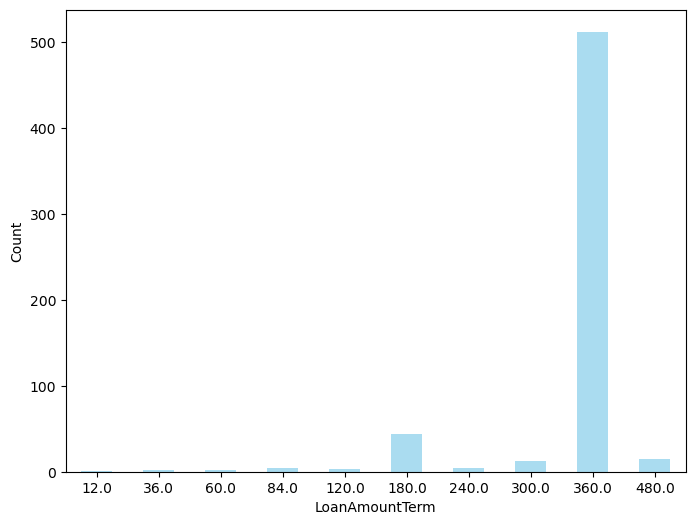

In [23]:
loan_amount_term_loan_count = data.groupby("Loan_Amount_Term")["Loan_ID"].count()
loan_amount_term_loan_count

plt.figure(figsize=(8, 6))
loan_amount_term_loan_count.plot(kind="bar", color=["skyblue"], alpha=0.7)
plt.ylabel("Count")
plt.xlabel("LoanAmountTerm")
plt.xticks(rotation=0)  # x축 레이블을 0도로 회전
plt.show()

### 신용 기록 - 누락된 값

In [ ]:
# 누락된 "신용 기록" 데이터의 %
print('Percent of missing "Credit_History" records is %.2f%%' %((data['Credit_History'].isnull().sum()/data.shape[0])*100))

In [ ]:
# Credit_History 항목의 count 값 그래프로 나타내기 ( seaborn 의 countplot 사용)
# your code here





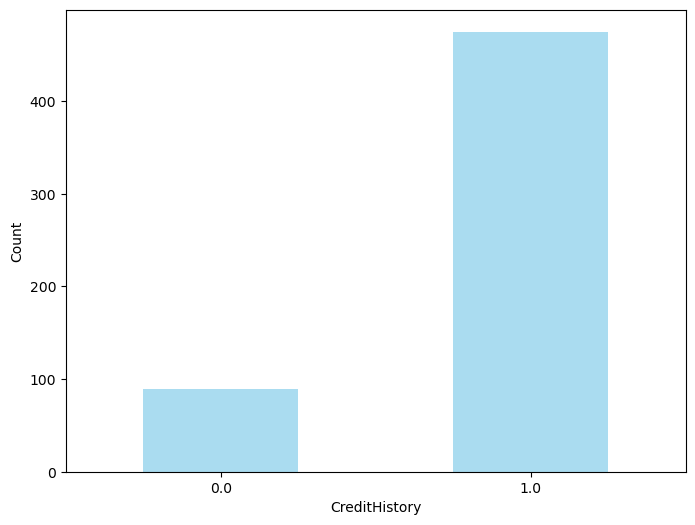

In [24]:
credit_history_loan_count = data.groupby("Credit_History")["Loan_ID"].count()
credit_history_loan_count

plt.figure(figsize=(8, 6))
credit_history_loan_count.plot(kind="bar", color=["skyblue"], alpha=0.7)
plt.ylabel("Count")
plt.xlabel("CreditHistory")
plt.xticks(rotation=0)  # x축 레이블을 0도로 회전
plt.show()

data[].value_counts

#### 모든 특성 및 열의 누락된 값을 파악하여 누락된 값을 대치하거나 삭제할 수 있습니다.



### 데이터 귀속 기준:
1. 특성이 본질적으로 범주형인 경우(예: 온도가 덥고, 습하고, 추울 수 있음) 가장 많이 발생하는 범주로 귀속할 수 있습니다.

2. 특성이 본질적으로 숫자인 경우(예: 사람의 키) 전체 특성의 평균 또는 중앙값을 취하여 누락된 행을 추정할 수 있습니다.


### 누락된 데이터/행을 삭제하기 전 주의 사항:

누락된 행의 수가 적은 경우에만 누락된 데이터를 삭제해야 합니다. 행을 삭제하면 누락된 데이터 문제를 해결할 수 있지만 해당 행의 다른 특성과 관련하여 데이터도 손실될 수 있습니다.

## 3. 데이터에 대한 최종 조정

데이터 세트의 누락된 값에 대한 평가를 기반으로 데이터를 다음과 같이 변경합니다.

* 주어진 행에 "성별"이 누락된 경우 남성(가장 일반적인 답변)으로 귀속합니다.
* 주어진 행에 "기혼여부"가 누락된 경우 예(가장 일반적인 답변)로 간주합니다.
* 주어진 행에 "부양자"가 누락된 경우 0(가장 일반적인 답변)으로 대치합니다.
* 주어진 행에 "자영업자"가 누락된 경우, no(가장 일반적인 답변)로 간주합니다.
* 주어진 행에 "대출금액"이 누락된 경우 데이터의 평균으로 대치합니다.
* 주어진 행에 "대출기간"이 누락된 경우 360(가장 일반적인 답변)으로 대치합니다.
* 주어진 행에 "신용 기록"이 누락된 경우 1.0(가장 일반적인 답변)으로 대치합니다.

In [ ]:
data

# Null값을 어떻게 채워넣을지 위에서 확인하고 대체 및 삭제

In [26]:
train_data = data.copy()
train_data['Gender'].fillna(train_data['Gender'].value_counts().idxmax(), inplace=True) 
# idmax는 분포에서 최빈도값, 경우에따라 평균값
# Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History 항목에 대해서 
# 위에서 최종 조정 결정한 방식대로 값을 변경합니다.
# your code here
train_data['Married'].fillna(train_data['Married'].value_counts().idxmax(), inplace=True) 
train_data['Dependents'].fillna(train_data['Dependents'].value_counts().idxmax(), inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].value_counts().idxmax(), inplace=True) 
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True) 
train_data['Credit_History'].fillna(train_data['Credit_History'].value_counts().idxmax(), inplace=True) 








In [27]:
# 누락된 값 확인
train_data.isnull().sum()
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [28]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 범주형 데이터를 숫자 데이터로 변환합니다.

1. 다음 셀에서 기계 학습 모델은 숫자만 가져와서 연산을 수행할 수 있으므로 범주형 데이터를 숫자 데이터로 변환해야 합니다. 형식(그림, 텍스트)에 관계없이 모든 데이터는 기계 학습 모델을 학습하기 전에 숫자 형식으로 변환해야 합니다.

예를 들어 'gender' 특성은 각각 1과 0으로 변환되는 'Male'과 'Female'이라는 두 개의 카테고리가 있습니다.

'거주 지역' 기능에는 각각 0, 1, 2로 변환되는 '반도시', '도시', '농촌'의 세 가지 범주가 있습니다.

In [ ]:
# 일부 개체 데이터 유형을 int64로 변환
# your code here

gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = ...        # ...your code here
dependents_stat = ...    # ...your code here
education_stat = ...     # ...your code here
property_stat = ...      # ...your code here

train_data['Gender'] = train_data['Gender'].replace(gender_stat)
train_data['Married'] = ...       # ...your code here
train_data['Dependents'] = ...    # ...your code here
train_data['Education'] = ...     # ...your code here
train_data['Self_Employed'] = ...    # ...your code here
train_data['Property_Area'] = ...    # ...your code here

In [29]:
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {"Yes": 1, "No": 0}
dependents_stat = {"0": 0, "1": 1, "2": 2, "3+": 3}
education_stat = {"Graduate": 1, "Not Graduate": 0}
selfemployed_stat = {"Yes": 1, "No": 0}
property_stat = {"Rural": 0, "Urban": 1, "Semiurban": 2}
loanstatus_stat = {"Y": 1, "N": 0}

train_data['Gender'] = train_data['Gender'].replace(gender_stat)
train_data['Married'] = train_data['Married'].replace(yes_no_stat)
train_data['Dependents'] = train_data['Dependents'].replace(dependents_stat)
train_data['Education'] = train_data['Education'].replace(education_stat)
train_data['Self_Employed'] = train_data['Self_Employed'].replace(selfemployed_stat)
train_data['Property_Area'] = train_data['Property_Area'].replace(property_stat)
train_data['Loan_Status'] = train_data['Loan_Status'].replace(loanstatus_stat)

In [30]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


#### 마지막으로 우리는 누락 데이터를 대체 후 데이터 세트에서 null 값의 총 수를 확인합니다. 모든 열/특성에서 null 값의 총 수가 감소한 것을 알 수 있습니다.

In [32]:
# 데이터 정보 미리보기
data.info()
data.isnull().sum()
print("")
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   C

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 이제 기계 학습 모델을 훈련하기 위해 전처리된 데이터를 사용할 수 있습니다.

## 4. 예측하기

In [ ]:
# 데이터, 테스트데이터 분리 안함 

In [40]:
# 기능 및 대상 분리
# your code here
x = train_data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1) 
# inplace True를 썼을 때에만 특정행렬이 완전히 삭제 됨
# drop 에서 Columns를 사용하는 경우 Column값에서 반드시 ' ,axis=1 을 추가할 것 '
y = train_data["Loan_Status"]

# 결과를 저장하고 표시하기 위해 변수를 만듭니다.
classifier = ('Random Forest','Decision Tree','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
score = []

#### 랜덤 포레스트 분류기(Random Forest Classifier)

In [41]:
clf = RandomForestClassifier(n_estimators=10) 
scores = cross_val_score(clf, x, y,cv=5) # cv 는 5번 돌리겠다. 
score.append(scores.mean()) # 스코어의 평균값 도출
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 76.70%


#### 의사 결정 트리 분류기(Decision Tree Classifier)

In [42]:
# your code here
clf = DecisionTreeClassifier()  # 의사결정 트리 분류기로 변경
scores = cross_val_score(clf, x, y, cv=5)
score.append(scores.mean())
print('The accuracy of classification (Decision Tree) is %.2f%%' % (scores.mean() * 100))





The accuracy of classification (Decision Tree) is 71.50%


#### k-최근접 이웃 분류기(K- Nearest Neighbours Classifiers)

In [43]:
clf = KNeighborsClassifier()  # KNN 분류기로 변경
scores = cross_val_score(clf, x, y, cv=5)
score.append(scores.mean())
print('The accuracy of classification (K-Nearest Neighbor) is %.2f%%' % (scores.mean() * 100))





The accuracy of classification (K-Nearest Neighbor) is 61.40%


#### 선형 SVM(Support Vector Machines) 분류기

In [38]:
from sklearn.svm import SVC
clf = svm.LinearSVC(max_iter=5000)  # 선형 SVM 분류기로 변경
scores = cross_val_score(clf, x, y, cv=5)
score.append(scores.mean())
print('The accuracy of classification (Linear SVM) is %.2f%%' % (scores.mean() * 100))

C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The accuracy of classification (Linear SVM) is 58.00%


C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### 이제 각 분류기의 결과를 비교할 수 있습니다.

In [51]:
!pip install tabulate
from tabulate import tabulate
tab=[['Machine Learing Model', 'Accuracy %']]
for i in range(len(score)):
    table = [classifier[i],score[i]*100]
    tab.append(table)
print(tabulate(tab))

---------------------  ----------
Machine Learing Model  Accuracy %
Random Forest          7670.0
Decision Tree          7150.0
K-Nearest Neighbor     6140.0
Linear SVM             5800.0
---------------------  ----------


In [48]:
print('The Best model is {} with a accuracy of {}'.format(classifier[score.index(max(score))],max(score)*100))

The Best model is Random Forest with a accuracy of 76.70131947221111


## 5. Result

결과는 랜덤 포레스트 분류기(Random Forest Classifier)가 분류 알고리즘 중에서 가장 높은 점수를 받았습니다.

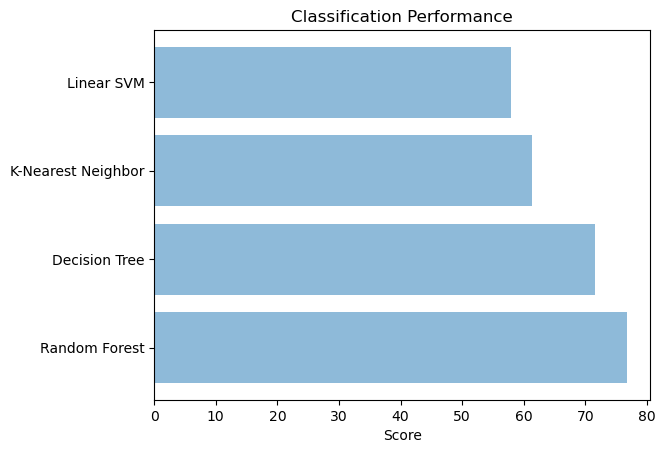

In [49]:
import matplotlib.pyplot as plt

# 분류기 및 점수 데이터
classifier = ('Random Forest', 'Decision Tree', 'K-Nearest Neighbor', 'Linear SVM')
y_pos = range(len(classifier))
score = [76.7, 71.5, 61.4, 58.0]  # 예시 점수, 실제 데이터에 맞게 수정하세요

# 그래프 그리기
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')

# 그래프 보여주기
plt.show()

## Reference
1. J. Heo and J. Y. Yang, "AdaBoost Based Bankruptcy Forecasting of Korean Construction Company," Applied Soft Computing, vol. 24, pp. 494-499, 2014.
2. C.-F. Tsai, "Feature Selection in Bankruptcy Prediction," Knowledge Based System, pp. 120-127, 2009.

## <font color=blue> 더해보기

1. cross_val_score() 대해 알아보고 정리해보세요.
2. 각 분류기별로 cross_val_score 실행 : for 문 사용하는 구문으로 적용해 보세요.
<br>

3. cross_val_score() 사용하지 말고 데이터를 학습용/테스트용으로 분리하여 각 분류기별로 학습하고 예측을 실행한 후 정확도, 정밀도, 재현율, F1-Score를 구해 출력해 보세요

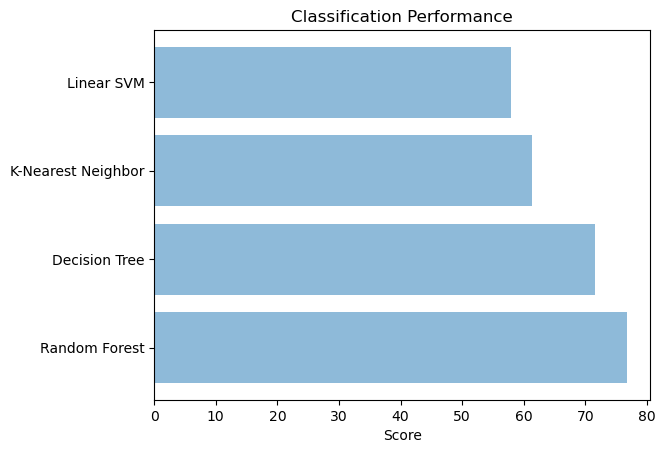

In [55]:
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

In [56]:
# cross_val_score()에 대해 알아보고 정리 다시 해볼from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.model_selection import cross_val_score

# 분류기 초기화
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'SVM': svm.SVC()
}
# 점수를 저장할 딕셔너리
scores = {}

# 각 분류기별로 cross_val_score 실행
for name, clf in classifiers.items():
    score = cross_val_score(clf, x, y, cv=5)
    scores[name] = score.mean()

# 결과 출력
for name, score in scores.items():
    print(f"The accuracy of {name} is {score:.2f}")

The accuracy of Random Forest is 0.79
The accuracy of Decision Tree is 0.71
The accuracy of K-Nearest Neighbor is 0.61
The accuracy of SVM is 0.69


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 데이터를 학습 및 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y )

# 만약 y_train이 텍스트라면 숫자로 인코딩
if isinstance(y_train[0], str):
    # 레이블 인코딩
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

# 분류기 초기화
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'SVM': svm.SVC()
}

# 결과를 저장할 딕셔너리
results = {}

# 각 분류기별로 학습, 예측, 평가
for name, clf in classifiers.items():
    # 학습
    clf.fit(x_train, y_train)

    # 예측
    y_pred = clf.predict(x_test)

    # 평가
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1, confusion]

# 결과 출력
for name, metrics in results.items():
    print(f"Results for {name}:")
    print(f"Accuracy: {metrics[0]:.2f}")
    print(f"Precision: {metrics[1]:.2f}")
    print(f"Recall: {metrics[2]:.2f}")
    print(f"F1-Score: {metrics[3]:.2f}")
    print(f"Confusion Matrix:\n{metrics[4]}\n")

Results for Random Forest:
Accuracy: 0.85
Precision: 0.85
Recall: 0.95
F1-Score: 0.90
Confusion Matrix:
[[24 14]
 [ 4 81]]

Results for Decision Tree:
Accuracy: 0.74
Precision: 0.84
Recall: 0.78
F1-Score: 0.80
Confusion Matrix:
[[25 13]
 [19 66]]

Results for K-Nearest Neighbor:
Accuracy: 0.65
Precision: 0.72
Recall: 0.81
F1-Score: 0.76
Confusion Matrix:
[[11 27]
 [16 69]]

Results for SVM:
Accuracy: 0.69
Precision: 0.69
Recall: 1.00
F1-Score: 0.82
Confusion Matrix:
[[ 0 38]
 [ 0 85]]

